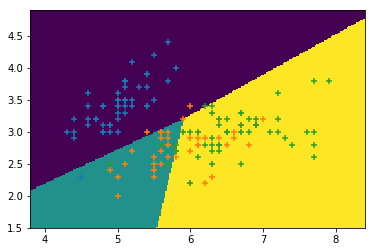

0.9473684210526315
None
0.9736842105263158
None
1.0
None
0.9473684210526315
None
0.8421052631578947
None
0.9736842105263158
None
0.9736842105263158
None
0.9736842105263158
None
0.9473684210526315
None
0.9210526315789473
None
0.9210526315789473
None
0.868421052631579
None
0.9473684210526315
None
0.8947368421052632
None
0.9736842105263158
None
0.9736842105263158
None
0.9473684210526315
None
0.9736842105263158
None
0.9210526315789473
None
0.9473684210526315
None
0.9210526315789473
None
1.0
None
0.9210526315789473
None
0.9473684210526315
None
0.9210526315789473
None
0.9736842105263158
None
0.9210526315789473
None
0.9473684210526315
None
0.9736842105263158
None
0.9736842105263158
None
1.0
None
0.9210526315789473
None
0.9473684210526315
None
0.9210526315789473
None
0.9473684210526315
None
0.8947368421052632
None
0.9736842105263158
None
0.9210526315789473
None
0.8947368421052632
None
0.7631578947368421
None
1.0
None
0.9210526315789473
None
1.0
None
0.8947368421052632
None
0.9736842105263158
N

In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

data = iris.data
target = iris.target

lr = LogisticRegression()

def graph(data, target, kn):
    x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
    y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    kn.fit(data, target)

    z = kn.predict(np.c_[xx.ravel(), yy.ravel()])

    z = z.reshape(xx.shape)
        
    plt.pcolormesh(xx, yy, z)
    plt.scatter(data[:,0][target == 0], data[:,1][target == 0], marker='+')
    plt.scatter(data[:,0][target == 1], data[:,1][target == 1], marker='+')
    plt.scatter(data[:,0][target == 2], data[:,1][target == 2], marker='+')
    plt.show()
    
graph(data[:, :2], target, lr)

def get_accuracy(cl):
    dtr, dts, ttr, tts = train_test_split(data, target)
    cl.fit(dtr, ttr)
    a = accuracy_score(tts, cl.predict(dts))
    print(a)

for i in range(0, 50): 
    a = get_accuracy(lr)
    print(a)

In [27]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

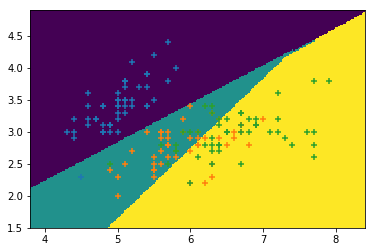

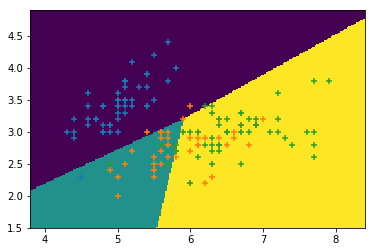

0.9736842105263158
0.9473684210526315


In [32]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

ovo = OneVsOneClassifier(LogisticRegression())
ovr = OneVsRestClassifier(LogisticRegression())

graph(data[:, :2], target, ovo)

graph(data[:, :2], target, ovr)
get_accuracy(ovo)
get_accuracy(ovr)